In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

df = pd.read_csv('titanic_train.csv').dropna()

X = df[['Age', 'Fare']]
y = df['Survived']

X

,Age,Fare
1,38.0,71.2833
3,35.0,53.1000
6,54.0,51.8625
10,4.0,16.7000
11,58.0,26.5500
...,...,...
871,47.0,52.5542
872,33.0,5.0000
879,56.0,83.1583
887,19.0,30.0000


In [3]:
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [4]:
model = LogisticRegression()

model.fit(X, y)

# Get predictions (probabilities)
predicted = model.predict_proba(X)[:, 1]

predicted[:10]

array([0.66335477, 0.67039378, 0.50773804, 0.84023094, 0.44646974,
       0.64121649, 0.70804939, 0.89473577, 0.57700532, 0.42125114])

In [5]:
# Getting log odds values
# also called as logits
log_odds = np.log(predicted/ (1-predicted))
log_odds[:10]

array([ 0.67828028,  0.70996659,  0.03095462,  1.65994741, -0.2149448 ,
        0.58064795,  0.88592921,  2.14005473,  0.31049187, -0.31763943])

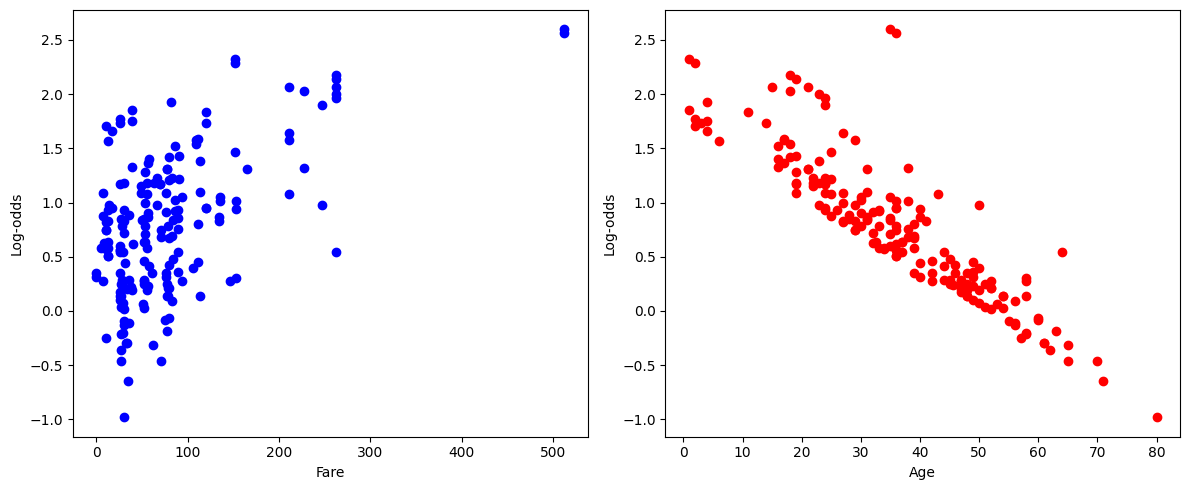

In [6]:
# Create figure and axes for subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot Fare Vs log-odds
ax[0].scatter(x=X['Fare'].values, y=log_odds, color='blue')
ax[0].set_xlabel('Fare')
ax[0].set_ylabel('Log-odds')

# Plot Age vs log-odds 
ax[1].scatter(x=X['Age'].values, y=log_odds, color='red')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Log-odds')

# Show plots
plt.tight_layout()
plt.show()

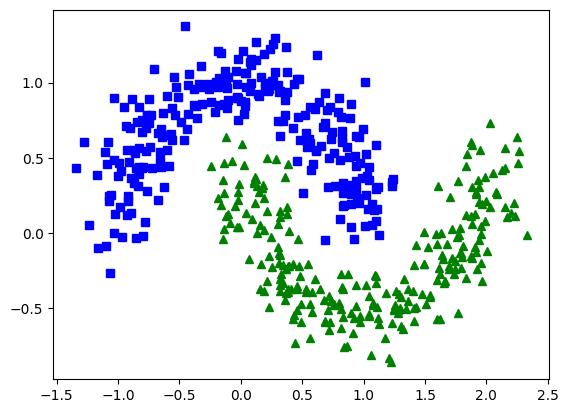

In [7]:
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

plt.plot(X[:,0][y==0], X[:, 1][y==0], 'bs')
plt.plot(X[:,0][y==1], X[:, 1][y==1], 'g^')

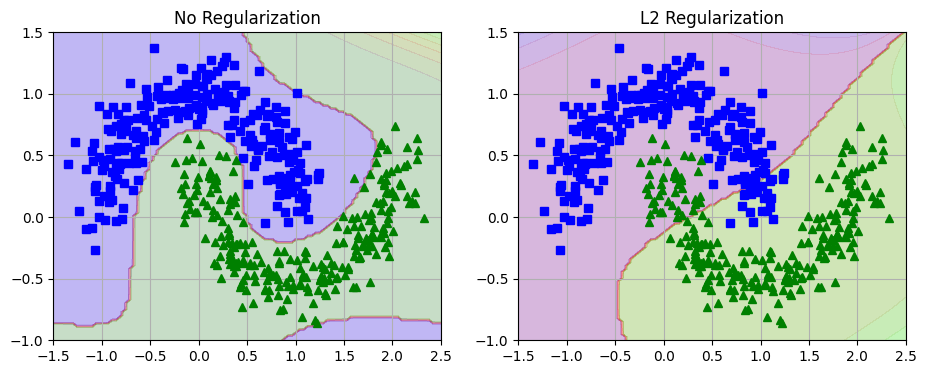

In [8]:
# Create a function to plot the dataset
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')

# Create a function to plot the decision boundary
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

# Logistic Regression without regularization
model_no_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("log_reg", LogisticRegression(C=1e10, solver="liblinear", random_state=42))
])

# Logistic Regression with L2 regularization
model_l2 = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("log_reg", LogisticRegression(C=0.001, solver="liblinear", random_state=42))  # C=0.1 implies a stronger regularization
])

model_no_reg.fit(X_train, y_train)
model_l2.fit(X_train, y_train)

# Now, let's plot the decision boundaries
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(model_no_reg, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("No Regularization")

plt.subplot(122)
plot_predictions(model_l2, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("L2 Regularization")

plt.show()
